# Limpieza y Análisis de URLs Legítimas - Sector SaaS

Este notebook contiene el análisis exploratorio y la limpieza inicial del dataset consolidado de URLs legítimas del sector SaaS.

## Objetivos

- Evaluar la calidad y cantidad de los datos crudos.  
- Identificar valores nulos, duplicados y otras inconsistencias en las columnas principales.  
- Filtrar filas sin URLs válidas para obtener un dataset limpio y útil para modelado.  
- Documentar cada paso para facilitar la comprensión y reproducibilidad.


In [2]:
import pandas as pd  # Importa pandas para manipulación de datos
import os            # Importa os para manejo de rutas

# Define la ruta base donde están los datos crudos
base_path = '/Users/test/Desktop/phishing-detector/data/raw/legitimas'

# Nombre del archivo crudo del sector SaaS
archivo = 'saas_legitimas_crudo.csv'

# Construye la ruta completa al archivo
ruta_archivo = os.path.join(base_path, archivo)

# Carga el dataset crudo en un DataFrame
df_saas = pd.read_csv(ruta_archivo)

# Imprime la cantidad de filas cargadas para referencia
print(f"Dataset SaaS cargado con {len(df_saas)} filas.")

# Muestra las columnas disponibles en el dataset
print(f"Columnas disponibles: {df_saas.columns.tolist()}")


Dataset SaaS cargado con 72 filas.
Columnas disponibles: ['empresa', 'url']


In [3]:
# Muestra información general del DataFrame (tipo de columnas, filas, memoria)
print("Información general del DataFrame:")
print(df_saas.info())

# Muestra el conteo de valores nulos por columna
print("\nValores nulos por columna:")
print(df_saas.isnull().sum())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   empresa  72 non-null     object
 1   url      72 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Valores nulos por columna:
empresa    0
url        0
dtype: int64


In [4]:
# Filtra filas donde la columna 'url' NO sea nula
df_saas_limpio = df_saas[df_saas['url'].notna()].copy()

# Muestra cuántas filas quedan tras filtrar URLs nulas
print(f"Filas tras eliminar URLs nulas: {len(df_saas_limpio)}")


Filas tras eliminar URLs nulas: 72


In [5]:
import validators  # Importa la librería para validar URLs

# Función para validar URLs
def es_url_valida(url):
    if pd.isna(url):
        return False
    return validators.url(url)

# Crea columna nueva con el resultado de la validación de URLs
df_saas_limpio['url_valida'] = df_saas_limpio['url'].apply(es_url_valida)

# Resumen validación URLs
total_urls = len(df_saas_limpio)
urls_validas = df_saas_limpio['url_valida'].sum()
urls_invalidas = total_urls - urls_validas

print(f"Total URLs: {total_urls}")
print(f"URLs válidas: {urls_validas} ({urls_validas / total_urls * 100:.2f}%)")
print(f"URLs inválidas: {urls_invalidas} ({urls_invalidas / total_urls * 100:.2f}%)")

# Muestra ejemplos de URLs inválidas, si existen
if urls_invalidas > 0:
    print("Ejemplos de URLs inválidas:")
    print(df_saas_limpio.loc[~df_saas_limpio['url_valida'], 'url'].head(10))


Total URLs: 72
URLs válidas: 72 (100.00%)
URLs inválidas: 0 (0.00%)


Distribución por empresa:
empresa
BOX            30
SLACK          28
GOOGLE          4
ZOOM            3
FASTMAIL        2
OVHCLOUD        2
MEGA            1
YANDEX MAIL     1
ICLOUD          1
Name: count, dtype: int64


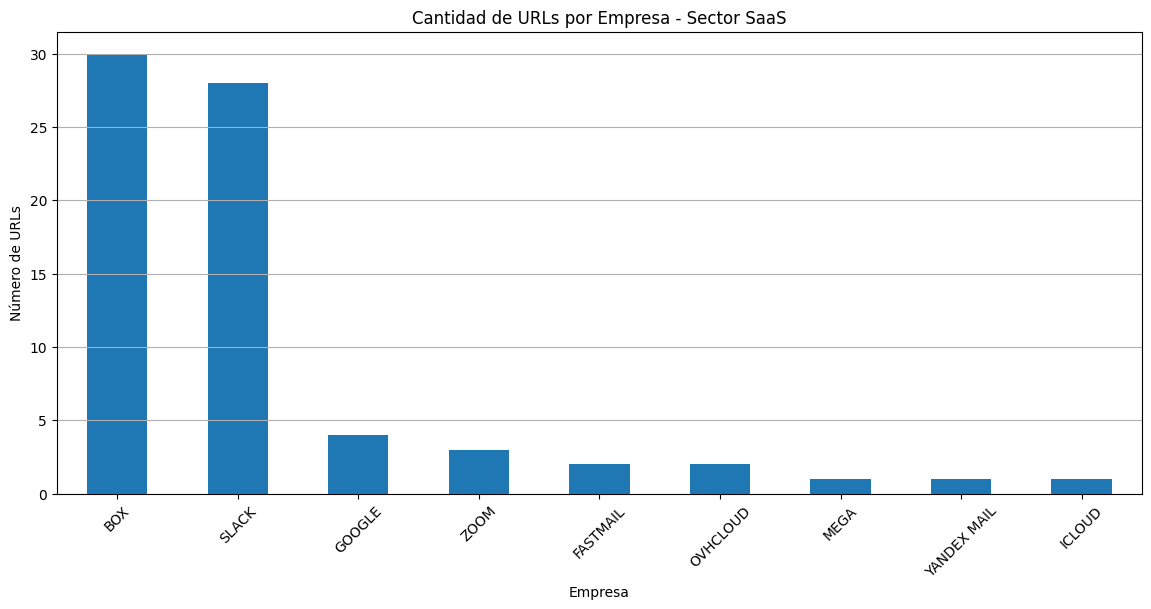

In [6]:
# Normaliza nombres de empresa (mayúsculas y sin espacios extra)
df_saas_limpio['empresa'] = df_saas_limpio['empresa'].str.upper().str.strip()

# Cuenta URLs por empresa
distribucion = df_saas_limpio['empresa'].value_counts()

# Muestra la distribución
print("Distribución por empresa:")
print(distribucion)

import matplotlib.pyplot as plt  # Importa matplotlib para graficar

# Configura tamaño del gráfico
plt.figure(figsize=(14,6))

# Genera gráfico de barras para la distribución
distribucion.plot(kind='bar')

# Añade títulos y etiquetas
plt.title('Cantidad de URLs por Empresa - Sector SaaS')
plt.xlabel('Empresa')
plt.ylabel('Número de URLs')

# Rota etiquetas para mejor visualización
plt.xticks(rotation=45)

# Añade cuadrícula horizontal
plt.grid(axis='y')

# Muestra gráfico
plt.show()


In [7]:
import os  # Importa os para manejo de directorios y archivos

# Define ruta base para guardar datasets procesados
base_path_processed = '/Users/test/Desktop/phishing-detector/data/processed/legitimas'

# Crea la carpeta si no existe
os.makedirs(base_path_processed, exist_ok=True)

# Nombre del archivo limpio a guardar
archivo_limpio = 'saas_legitimas_limpio.csv'

# Construye la ruta completa para guardar el archivo
ruta_guardado = os.path.join(base_path_processed, archivo_limpio)

# Selecciona columnas relevantes para modelado
columnas_relevantes = ['empresa', 'url']

# Crea DataFrame solo con columnas relevantes y elimina duplicados
df_modelo = df_saas_limpio[columnas_relevantes].drop_duplicates()

# Muestra cantidad de filas tras eliminar duplicados
print(f"Filas tras eliminar duplicados en columnas relevantes: {len(df_modelo)}")

# Guarda DataFrame limpio en CSV sin índice
df_modelo.to_csv(ruta_guardado, index=False)

# Confirma que el archivo fue guardado
print(f"Dataset limpio guardado en: {ruta_guardado}")


Filas tras eliminar duplicados en columnas relevantes: 72
Dataset limpio guardado en: /Users/test/Desktop/phishing-detector/data/processed/legitimas/saas_legitimas_limpio.csv
